In [1]:
from pathlib import Path
import os
import matplotlib.pyplot as plt
# Set your desired directory path
project_path = "C:/Users/HP/Desktop/UNOS data/codes/survival-modelling-unos"
#project_path = "/Users/felipesimon/UMN/Research/KidneyFailure/survival-modelling-unos"
path = Path(project_path).resolve()  # Get the absolute path

# Change the working directory using os.chdir()
os.chdir(path)
from src.utils import *
from src.processing import *
import src.processing as pre
from src.imputation import MICE
from src.t_star import TStar 
from src.preprocessingPipeline import PreprocessingPipeline
from src.metrics import Metrics
from src.subpopulations import SubpopulationCreator
from src.coxphm import CoxProportionalHazardsModel
from src.subpopulations import SubpopulationCreator
from src.monte_carlo import Monte_Carlo_Cross_Validation

c:\Users\HP\Desktop\UNOS data\codes\survival-modelling-unos\.venv\Lib\site-packages\dask\dataframe\__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
df = pd.read_excel('C:/Users/HP/Desktop/EUROTRANSPLANT/formatted_dataset_final.xlsx')


In [3]:
df.head()

,pseudoid,time_to_death,death,time_to_graft_failure,graft_failure,time_to_retx_or_death,retx_or_death,time_to_rereg,rereg,time_to_acgl,...,er_mmlod_per_locus_hla_drb345,er_mmlod_per_locus_hla_dqb,er_mmlod_per_locus_hla_dqa,emma_sa_aa_total,emma_sa_aa_a,emma_sa_aa_b,emma_sa_aa_c,emma_sa_aa_dr,emma_sa_aa_dqa1,emma_sa_aa_dqb1
0,1,5017.63,1,5017.63,1,5017.63,1,5017.63,0,5017.63,...,NaN,13-0,9-0,84,19,3,5,17,18,22
1,2,138.00,0,138.00,0,138.00,0,138.00,0,138.00,...,0,0-0,0-0,23,7,10,6,0,0,0
2,3,7401.00,0,3778.00,1,7401.00,0,3981.55,1,3778.00,...,0-0,0-0,0-0,13,13,0,0,0,0,0
3,4,5844.00,0,5844.00,0,5844.00,0,5844.00,0,5844.00,...,0-0,0-3,1-0,4,0,0,0,1,1,2
4,5,5844.00,0,3314.00,1,5420.41,1,4264.35,1,3314.00,...,0-0,0-0,0-0,0,0,0,0,0,0,0


In [6]:
df.columns

Index(['pseudoid', 'time_to_death', 'death', 'time_to_graft_failure',
       'graft_failure', 'time_to_retx_or_death', 'retx_or_death',
       'time_to_rereg', 'rereg', 'time_to_acgl', 'acgl', 'time_to_dcgl',
       'dcgl', 'patient_country', 'diag_group_at_exit', 'donor_age',
       'd_height', 'donor_last_creat', 'graft_dcd', 'donor_hypertension',
       'donor_diabetes', 'donor_weight', 'death_cause_group', 'graft_hcvab',
       'wfmr_r_age', 'time_on_dial', 'd_urine_protein', 'mmb_hla_a',
       'mmb_hla_b', 'mmb_hla_c', 'mmb_hla_dr', 'mmb_hla_dqb', 'mms_hla_b',
       'mms_hla_a', 'mms_hla_c', 'mms_hla_dqb', 'mms_hla_dr', 'year_txp',
       'max_pra', 'vpra', 'er_mmlod_i_abv', 'er_mmlod_i_oth',
       'er_mmlod_drb1345_abv', 'er_mmlod_drb1345_oth', 'er_mmlod_dq_abv',
       'er_mmlod_dq_oth', 'er_mmlod_per_locus_hla_a',
       'er_mmlod_per_locus_hla_b', 'er_mmlod_per_locus_hla_c',
       'er_mmlod_per_locus_hla_dr', 'er_mmlod_per_locus_hla_drb345',
       'er_mmlod_per_locus_hla_

In [11]:
df.drop(df.describe().columns, axis='columns')

,patient_country,diag_group_at_exit,death_cause_group,er_mmlod_per_locus_hla_a,er_mmlod_per_locus_hla_b,er_mmlod_per_locus_hla_c,er_mmlod_per_locus_hla_dr,er_mmlod_per_locus_hla_drb345,er_mmlod_per_locus_hla_dqb,er_mmlod_per_locus_hla_dqa
0,Belgium,glomerular,CVA,0-12,0-12,5-0,20-0,NaN,13-0,9-0
1,Austria,congenital,CVA,2-5,3-11,7-7,0-0,0,0-0,0-0
2,Germany,glomerular,Head trauma,0-10,0-0,0-0,0-0,0-0,0-0,0-0
3,Austria,glomerular,CVA,0-0,0,0,0-2,0-0,0-3,1-0
4,Germany,other,Head trauma,0-0,0-0,0-0,0-0,0-0,0-0,0-0
...,...,...,...,...,...,...,...,...,...,...
24134,Croatia,polycystic,CVA,0-16,6-14,8-3,4-2,6,6-2,2-0
24135,Germany,other,CVA,11-0,4-9,7-5,4-10,0,0-14,0-3
24136,Netherlands,other,Anoxia,0-0,0-0,0-0,4-0,0-10,0-5,3-0
24137,Netherlands,other,Other,10-4,1-9,0,6,1,7,3


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pseudoid,24139.0,12070.000000,6968.473410,1.00,6035.500,12070.000,18104.500,24139.000
time_to_death,24139.0,2397.834408,1666.353540,-2061.67,1096.000,2190.640,3381.000,8400.000
death,24139.0,0.208501,0.406245,0.00,0.000,0.000,0.000,1.000
time_to_graft_failure,24139.0,2148.379589,1634.235291,-2061.67,776.000,1866.000,3148.000,8400.000
graft_failure,24139.0,0.328887,0.469819,0.00,0.000,0.000,1.000,1.000
time_to_retx_or_death,24139.0,2295.879185,1630.966157,0.00,1058.885,2073.000,3287.000,8400.000
retx_or_death,24139.0,0.220763,0.414770,0.00,0.000,0.000,0.000,1.000
time_to_rereg,24139.0,2214.080686,1628.741789,0.00,921.365,1958.000,3279.000,8400.000
rereg,24139.0,0.091553,0.288400,0.00,0.000,0.000,0.000,1.000
time_to_acgl,24139.0,2147.465816,1633.995864,-2061.67,776.000,1863.550,3148.000,8400.000


In [18]:
df[['donor_age', 'd_height', 'donor_last_creat',
    'donor_hypertension', 'donor_diabetes', 'donor_weight',
   'graft_hcvab', 'wfmr_r_age', 'time_on_dial', 'mmb_hla_a', 
    'mmb_hla_b',  'mmb_hla_dr' ]].corr()

,donor_age,d_height,donor_last_creat,donor_hypertension,donor_diabetes,donor_weight,graft_hcvab,wfmr_r_age,time_on_dial,mmb_hla_a,mmb_hla_b,mmb_hla_dr
donor_age,1.000000,0.052936,-0.020985,0.368354,0.151725,0.185267,-0.034688,0.147617,-0.014495,0.053271,0.073074,0.072367
d_height,0.052936,1.000000,0.168960,-0.023495,0.001022,0.572882,0.004277,0.003287,0.015130,0.000527,-0.008002,-0.012690
donor_last_creat,-0.020985,0.168960,1.000000,0.017559,0.035524,0.208376,-0.004645,0.006160,0.072478,0.031292,0.039201,0.055180
donor_hypertension,0.368354,-0.023495,0.017559,1.000000,0.194791,0.179773,-0.016275,0.067428,0.026836,0.019766,0.038232,0.044973
donor_diabetes,0.151725,0.001022,0.035524,0.194791,1.000000,0.141098,-0.005946,0.042960,0.008398,0.019915,0.024123,0.025335
donor_weight,0.185267,0.572882,0.208376,0.179773,0.141098,1.000000,-0.001010,0.025770,0.051419,0.017414,0.020851,0.017369
graft_hcvab,-0.034688,0.004277,-0.004645,-0.016275,-0.005946,-0.001010,1.000000,0.015232,-0.007073,0.047033,0.057094,0.063579
wfmr_r_age,0.147617,0.003287,0.006160,0.067428,0.042960,0.025770,0.015232,1.000000,-0.080686,0.032760,0.041138,0.031657
time_on_dial,-0.014495,0.015130,0.072478,0.026836,0.008398,0.051419,-0.007073,-0.080686,1.000000,0.082033,0.121269,0.121956
mmb_hla_a,0.053271,0.000527,0.031292,0.019766,0.019915,0.017414,0.047033,0.032760,0.082033,1.000000,0.283751,0.211833


<Axes: >

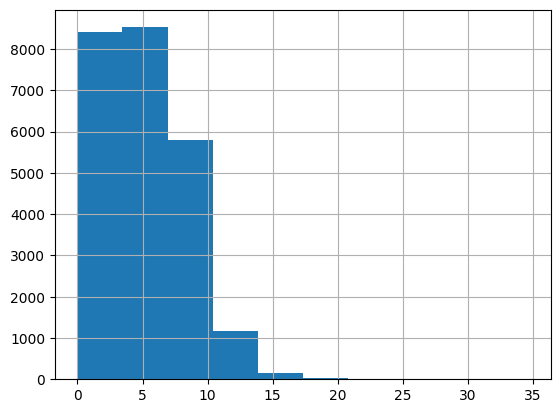

In [19]:
df['time_on_dial'].hist()